In [ ]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils

In [ ]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

In [4]:
# Create Directory for Training Data
os.mkdir("Desktop/Content/Crop-Brain-MRI")
os.mkdir("Desktop/Content/Crop-Brain-MRI/p_stc1")
os.mkdir("Desktop/Content/Crop-Brain-MRI/g_stc2")
os.mkdir("Desktop/Content/Crop-Brain-MRI/normal")
os.mkdir("Desktop/Content/Crop-Brain-MRI/m_stc3")

# Create Directory for Testing Data
os.mkdir("Desktop/Content/Test-Data")
os.mkdir("Desktop/Content/Test-Data/p_stc1")
os.mkdir("Desktop/Content/Test-Data/g_stc2")
os.mkdir("Desktop/Content/Test-Data/normal")
os.mkdir("Desktop/Content/Test-Data/m_stc3")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Desktop/Content/Crop-Brain-MRI'

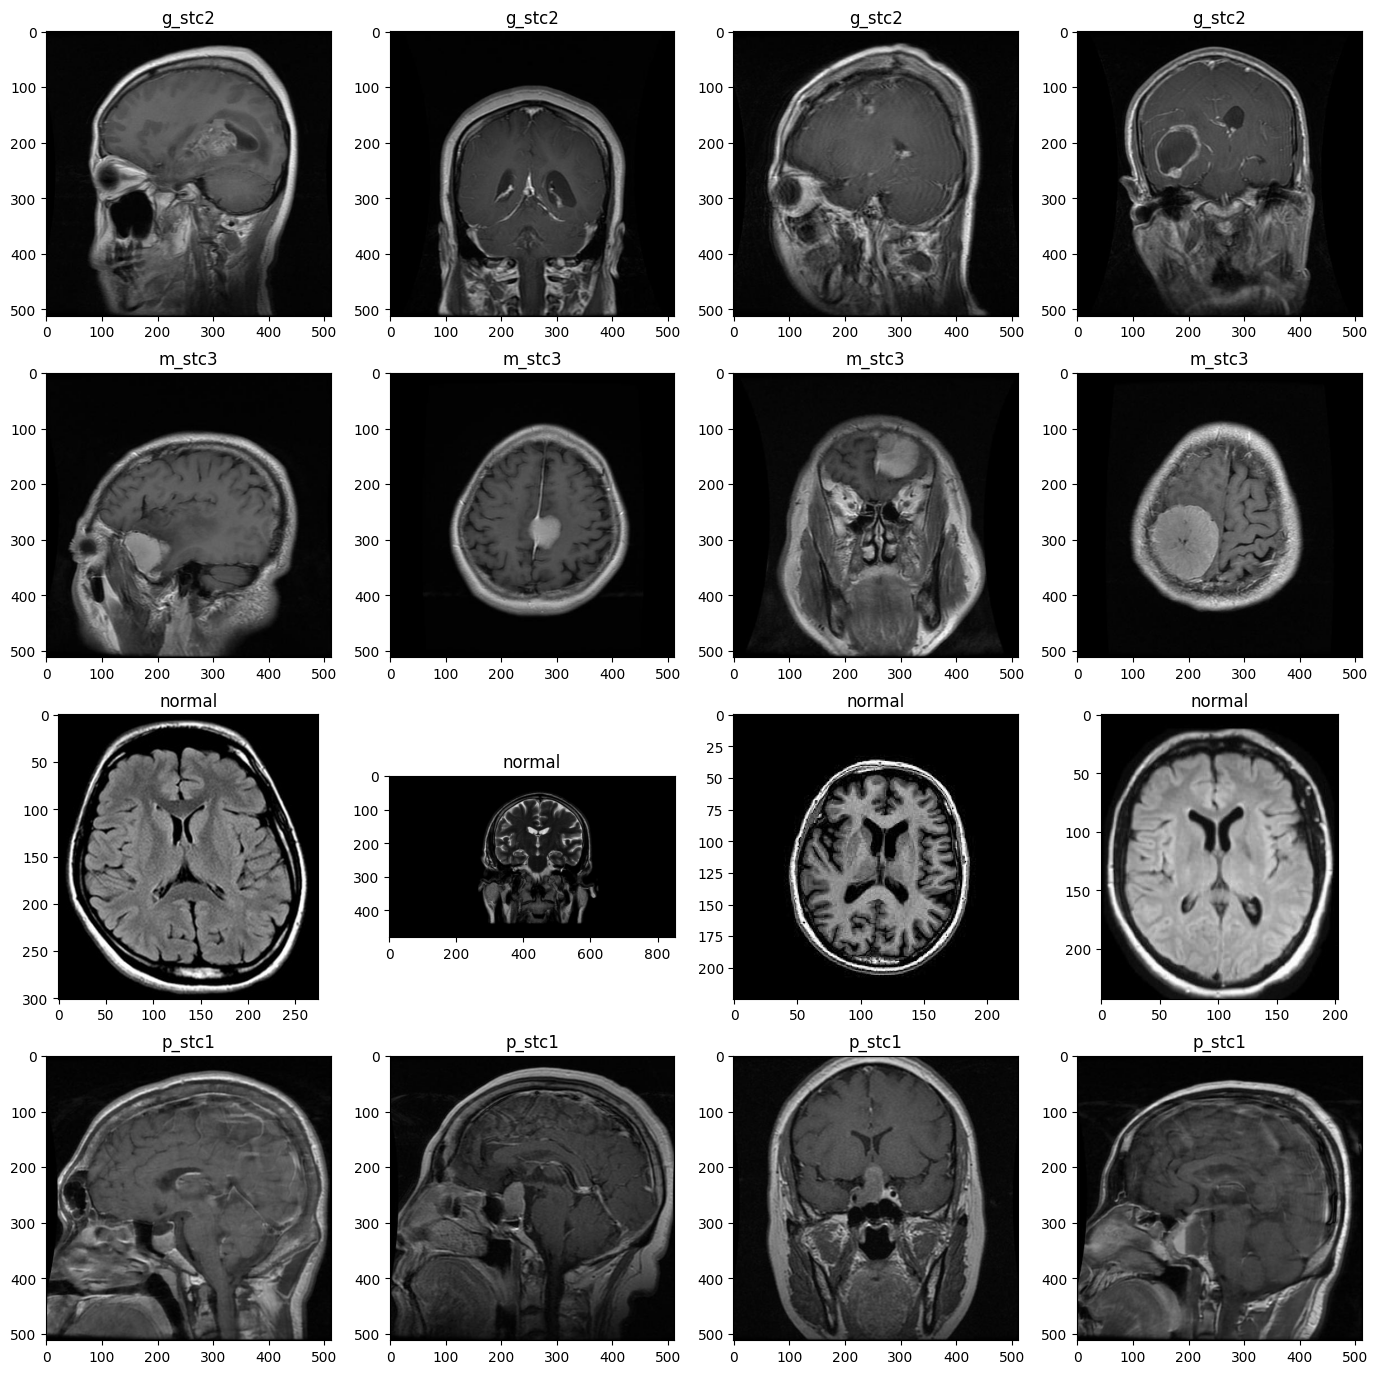

In [4]:
train_dir = "Desktop/btc1/Training/"
test_dir = "Desktop/btc1/Testing/"
classes = os.listdir("Desktop/btc1/Training")
files_path_dict = {}

for c in classes:
  files_path_dict[c] = list(map(lambda x : train_dir+c+ '/' + x, os.listdir(train_dir + c)))

plt.figure(figsize=(17,17))
index=0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

  for i in range(1,5):
    index += 1
    plt.subplot(4,4,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

In [ ]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

In [3]:
example_img = cv2.imread("Desktop/btc1/Training/g_stc2/gg (10).jpg")
cropped_image = crop_image(example_img, plot=True)

NameError: name 'crop_image' is not defined

In [5]:
# Crop the Training Images and Save it to the Directory we previously cretaed
stc2 = train_dir + "g_stc2"
stc3 = train_dir + "m_stc3"
normal = train_dir + "normal"
stc1 = train_dir + "p_stc1"

j=0
for i in tqdm (os.listdir(stc2)):
  path = os.path.join(stc2,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Crop-Brain-MRI/g_stc2/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm (os.listdir(stc3)):
  path = os.path.join(stc3,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Crop-Brain-MRI/m_stc3/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm (os.listdir(normal)):
  path = os.path.join(normal,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Crop-Brain-MRI/normal/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1   

j=0
for i in tqdm (os.listdir(stc1)):
  path = os.path.join(stc1,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Crop-Brain-MRI/p_stc1/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

  0%|                                                                                          | 0/826 [00:00<?, ?it/s]


NameError: name 'crop_image' is not defined

In [7]:
# Crop the Testing Images and Save it to the Directory we previously created
stc2 = test_dir + "g_stc2"
stc3 = test_dir + "m_stc3"
normal = test_dir + "normal"
stc1 = test_dir + "p_stc1"

j=0
for i in tqdm (os.listdir(stc2)):
  path = os.path.join(stc2,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Test-Data/g_stc2/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm (os.listdir(stc3)):
  path = os.path.join(stc3,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Test-Data/m_stc3/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm (os.listdir(normal)):
  path = os.path.join(normal,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Test-Data/normal/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1   

j=0
for i in tqdm (os.listdir(stc1)):
  path = os.path.join(stc1,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "Desktop/Content/Test-Data/stc1/" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


NameError: name 'crop_image' is not defined

In [8]:
# Use Image Data Generator to perform this task.
datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory('Desktop/Content/Crop-Brain-MRI/', target_size= (224,224), batch_size=32,class_mode='categorical',subset='training')

valid_data = datagen.flow_from_directory('Desktop/Content/Crop-Brain-MRI/', target_size= (224,224), batch_size=32,class_mode='categorical',subset='validation')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory('Desktop/Content/Test-Data/', target_size= (224,224),class_mode='categorical')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:

# View the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'g_stc2': 0, 'm_stc3': 1, 'normal': 2, 'p_stc1': 3}
{'g_stc2': 0, 'm_stc3': 1, 'normal': 2, 'p_stc1': 3}


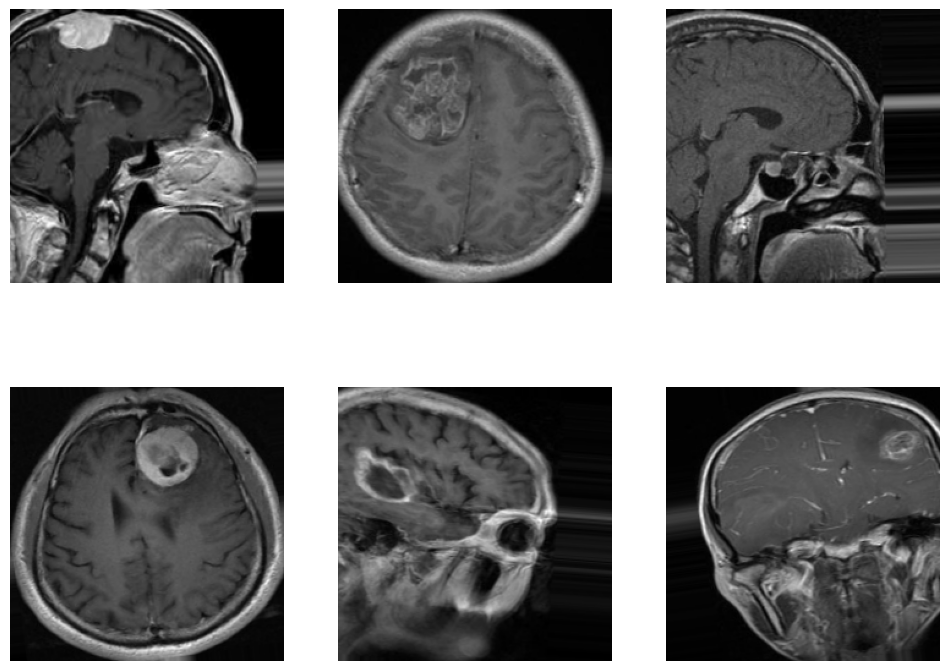

In [10]:
# View the augmented data.
sample_x , sample_y = next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  sample= array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()

In [11]:
# Build the Model
effnet = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(224,224,3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs = effnet.input, outputs = model)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [12]:
model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5", monitor= "val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

In [ ]:
# Train the model
history = model.fit(train_data, epochs=7, validation_data=valid_data, verbose=1, callbacks=[checkpoint,earlystop])

In [ ]:
# Plot the training curves
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,8)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc="upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train","Val"],loc="upper left")